In [91]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import pandas as pd
from collections import OrderedDict
from pandas import ExcelWriter
from pandas import ExcelFile

In [92]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [93]:
url='http://stats.espncricinfo.com/ci/engine/player/26421.html?class=2;template=results;type=batting;view=innings'
html = urllib.request.urlopen(url, context=ctx).read()
player_name = ''

In [94]:
def get_table_headers():
    global player_name
    bs=BeautifulSoup(html, "lxml")
    mydivs = bs.findAll("div", {"class": "icc-home"})
    player_name = mydivs[0].findAll("a")[0].text.split("/")[2]
    temp_data=OrderedDict()
    list_of_dict=[]
    bs=BeautifulSoup(html, "lxml")
    headers_soup=bs.find_all("tr",{"class":"headlinks"})
    headers_tag = headers_soup[0].find_all("th")
    list_of_headers = []
    for header in headers_tag:
        list_of_headers.append(header.text)
    return list_of_headers    


In [95]:
def get_stats_list():
    temp_data=OrderedDict()
    list_of_dict=[]
    bs=BeautifulSoup(html, "lxml")
    table_body=bs.find_all('tbody')
    stats_table = table_body[1]
    rows = stats_table.find_all("tr")
    table_data_list = []
    for row in rows:
        row_data = []
        col = row.find_all("td")
        row_data = [c.text.strip() for c in col]
        table_data_list.append(row_data)
    return table_data_list    
    

In [96]:
list_of_headers = get_table_headers()
list_of_headers[-1] = 'Match No'
table_data_list = get_stats_list()

In [97]:
data_frame = pd.DataFrame(table_data_list)
data_frame.columns = list_of_headers

In [98]:
data_frame = data_frame.drop('', 1)


In [99]:
data_frame

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No
0,38,70,32,4,1,118.75,8,caught,1,v Sri Lanka,Harare,5 Jun 2010,ODI # 2988
1,DNB,-,-,-,-,-,-,-,2,v Australia,Visakhapatnam,20 Oct 2010,ODI # 3060
2,0,3,2,0,0,0.00,8,caught,1,v New Zealand,Guwahati,28 Nov 2010,ODI # 3070
3,DNB,-,-,-,-,-,-,-,2,v New Zealand,Jaipur,1 Dec 2010,ODI # 3072
4,DNB,-,-,-,-,-,-,-,2,v New Zealand,Vadodara,4 Dec 2010,ODI # 3074
5,DNB,-,-,-,-,-,-,-,2,v New Zealand,Bengaluru,7 Dec 2010,ODI # 3076
6,DNB,-,-,-,-,-,-,-,2,v New Zealand,Chennai,10 Dec 2010,ODI # 3077
7,10*,14,7,1,0,142.85,9,not out,1,v West Indies,Chennai,20 Mar 2011,ODI # 3141
8,DNB,-,-,-,-,-,-,-,2,v Australia,Ahmedabad,24 Mar 2011,ODI # 3143
9,15,43,27,0,0,55.55,8,caught,2,v West Indies,North Sound,13 Jun 2011,ODI # 3162


In [100]:
import numpy as np
data_frame["Runs"] = data_frame["Runs"].replace("DNB","None")
data_frame["Runs"] = data_frame["Runs"].replace("TDNB","None")

In [101]:
# data_frame.loc[:,"Runs"] = data_frame.loc[:,"Runs"].ffill()

In [102]:
data_frame

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No
0,38,70,32,4,1,118.75,8,caught,1,v Sri Lanka,Harare,5 Jun 2010,ODI # 2988
1,None,-,-,-,-,-,-,-,2,v Australia,Visakhapatnam,20 Oct 2010,ODI # 3060
2,0,3,2,0,0,0.00,8,caught,1,v New Zealand,Guwahati,28 Nov 2010,ODI # 3070
3,None,-,-,-,-,-,-,-,2,v New Zealand,Jaipur,1 Dec 2010,ODI # 3072
4,None,-,-,-,-,-,-,-,2,v New Zealand,Vadodara,4 Dec 2010,ODI # 3074
5,None,-,-,-,-,-,-,-,2,v New Zealand,Bengaluru,7 Dec 2010,ODI # 3076
6,None,-,-,-,-,-,-,-,2,v New Zealand,Chennai,10 Dec 2010,ODI # 3077
7,10*,14,7,1,0,142.85,9,not out,1,v West Indies,Chennai,20 Mar 2011,ODI # 3141
8,None,-,-,-,-,-,-,-,2,v Australia,Ahmedabad,24 Mar 2011,ODI # 3143
9,15,43,27,0,0,55.55,8,caught,2,v West Indies,North Sound,13 Jun 2011,ODI # 3162


In [103]:
indexed = data_frame.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this


In [104]:
data_frame['Average'] = 0
data_frame['Total Runs'] = 0

In [105]:
data_frame

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Average,Total Runs
0,38,70,32,4,1,118.75,8,caught,1,v Sri Lanka,Harare,5 Jun 2010,ODI # 2988,0,0
1,None,-,-,-,-,-,-,-,2,v Australia,Visakhapatnam,20 Oct 2010,ODI # 3060,0,0
2,0,3,2,0,0,0.00,8,caught,1,v New Zealand,Guwahati,28 Nov 2010,ODI # 3070,0,0
3,None,-,-,-,-,-,-,-,2,v New Zealand,Jaipur,1 Dec 2010,ODI # 3072,0,0
4,None,-,-,-,-,-,-,-,2,v New Zealand,Vadodara,4 Dec 2010,ODI # 3074,0,0
5,None,-,-,-,-,-,-,-,2,v New Zealand,Bengaluru,7 Dec 2010,ODI # 3076,0,0
6,None,-,-,-,-,-,-,-,2,v New Zealand,Chennai,10 Dec 2010,ODI # 3077,0,0
7,10*,14,7,1,0,142.85,9,not out,1,v West Indies,Chennai,20 Mar 2011,ODI # 3141,0,0
8,None,-,-,-,-,-,-,-,2,v Australia,Ahmedabad,24 Mar 2011,ODI # 3143,0,0
9,15,43,27,0,0,55.55,8,caught,2,v West Indies,North Sound,13 Jun 2011,ODI # 3162,0,0


In [106]:
runs = 0
matches = 0
for i in indexed:
    current_row = data_frame.loc[i]
    if current_row.Runs == "None":
        runs = runs + 0
    elif '*' in current_row.Runs:
        run = current_row.Runs.replace("*","")
        runs = runs + int(run)
    else:
        matches+=1
        runs = runs + int(current_row.Runs)
#     data_frame.loc[i,"Averages"] = runs/matches
#     print(data_frame.loc[i,"Runs"])
    data_frame.loc[i,"Total Runs"] = runs
    data_frame.loc[i,"Average"] = round(runs/matches,2)

In [107]:
data_frame.reset_index(inplace=True)

In [108]:
data_frame

,index,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Average,Total Runs
0,0,38,70,32,4,1,118.75,8,caught,1,v Sri Lanka,Harare,5 Jun 2010,ODI # 2988,38.00,38
1,1,None,-,-,-,-,-,-,-,2,v Australia,Visakhapatnam,20 Oct 2010,ODI # 3060,38.00,38
2,2,0,3,2,0,0,0.00,8,caught,1,v New Zealand,Guwahati,28 Nov 2010,ODI # 3070,19.00,38
3,3,None,-,-,-,-,-,-,-,2,v New Zealand,Jaipur,1 Dec 2010,ODI # 3072,19.00,38
4,4,None,-,-,-,-,-,-,-,2,v New Zealand,Vadodara,4 Dec 2010,ODI # 3074,19.00,38
5,5,None,-,-,-,-,-,-,-,2,v New Zealand,Bengaluru,7 Dec 2010,ODI # 3076,19.00,38
6,6,None,-,-,-,-,-,-,-,2,v New Zealand,Chennai,10 Dec 2010,ODI # 3077,19.00,38
7,7,10*,14,7,1,0,142.85,9,not out,1,v West Indies,Chennai,20 Mar 2011,ODI # 3141,24.00,48
8,8,None,-,-,-,-,-,-,-,2,v Australia,Ahmedabad,24 Mar 2011,ODI # 3143,24.00,48
9,9,15,43,27,0,0,55.55,8,caught,2,v West Indies,North Sound,13 Jun 2011,ODI # 3162,21.00,63


<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

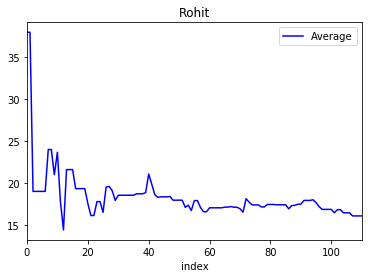

In [90]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Agg')
# from matplotlib.figure import Figure


plt.figure(figsize=(20,20))
plt.figure().suptitle('test title', fontsize=20)
data_frame.plot(kind='line',x="index",y='Average',color='Blue',title="Rohit")
plt.savefig("file.jpg",dpi=200)
# data_frame.plot.line(x="index",y="Average")

